In [1]:
#Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
dimport seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('sales_train.csv')
test=pd.read_csv('test.csv')
items=pd.read_csv('items.csv')
shops=pd.read_csv('shops.csv')
item_categories=pd.read_csv('item_categories.csv')
submission=pd.read_csv('sample_submission.csv')

In [5]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [40]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


Here we see minimum item sale in a day is negative value wich is not possible. so we only take those data in which item_cnt_day is greater than or equal to zero.

There is one item which is sold 2169 times in one day in one shop. When we checked other sales of that item we found that it is way above than normal sale. so wer will remove that data too.



In [20]:
train=train[train['item_cnt_day']>=0]

In [37]:
train[train['item_cnt_day']>2000]['item_id'].value_counts()

11373    1
Name: item_id, dtype: int64

In [35]:
train[train['item_id']==11373]['item_cnt_day'].mean()

14.144396551724139

In [38]:
train=train[train['item_cnt_day']<1000]

Now lets take only those items and shops which is in our test data. So we shouldn't train our model on unnecessary data.

In [39]:
test_shops=test['shop_id'].unique()
test_items = test.item_id.unique()
train=train[train['shop_id'].isin(test_shops)]
train=train[train['item_id'].isin(test_items)]

Here date_block_num represents month of item sold in particular year. January 2013 is 0, February 2013 is 1,..., October 2015 is 33. Since we have to predict sales of particular item in a particular shop in a month, we will group sales of a item in a shop of a month.  


In [42]:
train_df=train.groupby(['shop_id','date_block_num','item_id'])['item_cnt_day'].sum().reset_index()

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599911 entries, 0 to 599910
Data columns (total 4 columns):
shop_id           599911 non-null int64
date_block_num    599911 non-null int64
item_id           599911 non-null int64
item_cnt_day      599911 non-null float64
dtypes: float64(1), int64(3)
memory usage: 18.3 MB


In [45]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,1.221496e+06,1.221496e+06,1.221496e+06,1.221496e+06,1.221496e+06
mean,1.935395e+01,3.215225e+01,9.618661e+03,1.029236e+03,1.324301e+00
std,9.110813e+00,1.646377e+01,6.300614e+03,1.824919e+03,2.515053e+00
min,0.000000e+00,2.000000e+00,3.000000e+01,5.000000e-01,1.000000e+00
25%,1.200000e+01,1.900000e+01,4.181000e+03,2.990000e+02,1.000000e+00
50%,2.100000e+01,3.100000e+01,7.856000e+03,5.490000e+02,1.000000e+00
75%,2.700000e+01,4.600000e+01,1.523700e+04,1.199000e+03,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216700e+04,5.920000e+04,6.240000e+02


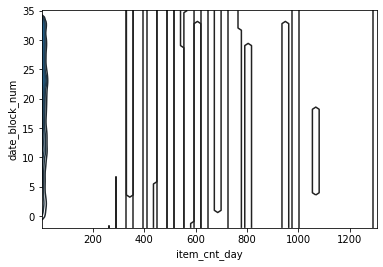

In [47]:
sns.kdeplot(data=train_df['item_cnt_day'],data2=train_df['date_block_num'])

In [6]:
def category(item_id):
    return int(items[items['item_id']==item_id]['item_category_id'].values)

In [7]:
train_df['category_id']=train['item_id'].apply(category)

In [11]:
train_df['item_id'].value_counts()

5822     1236
2308     1201
5821     1156
2808     1127
20949    1125
         ... 
5731        1
2492        1
547         1
12857       1
11996       1
Name: item_id, Length: 4716, dtype: int64

In [ ]:
items['item_id'].value_counts()